<module 'matplotlib.pyplot' from 'C:\\Users\\vnguy\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

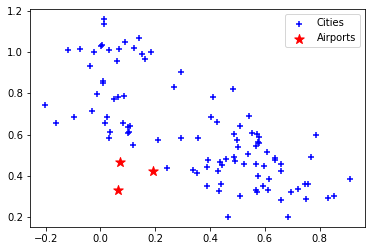

In [12]:
'''
Ivy Nguyen
CECS 451 Assignment 5
'''

import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [13]:
def updateNearestAirportLists(airports, cities):
    # dictionary that contains sets of cities for each airport
    # initialation 
    citiesDictionary = {}
    for index in range(num_air):
        citiesDictionary[index] = []
    
    # add cities to the dictionary
    for index, tuple in enumerate(list(cities)):
        # the current city
        city = tuple
        # calculate the distance square
        distance = np.sum((airports - city)**2, axis = 1)
        nearestAirport = np.argmin(distance)
        # add to the set of cities of the airport
        citiesDictionary[nearestAirport].append(city)    
    
    return citiesDictionary

def calcPartialDerivative(airports, citiesDictionary):
    # initialize a list of tuble to contain partial derivative
    partialAirports = []
    
    # calculate the partial derivative for each airport
    for index in range(num_air):
        partialDer = np.sum(2 * (airports[index] - citiesDictionary[index]), axis = 0)
        # add them to the list as a tuple
        partialAirports.append((partialDer[0], partialDer[1]))
    
    #list of tuple
    return partialAirports

def updateAirports(curLocation, partialDerivative):
    # alpha is from 0 to 1
    learningRate = 0.001
    # update new z
    newAirports = curLocation - learningRate * np.array(partialDerivative)
    return newAirports

def calcObjFunction(airports, citiesDictionary):
    result = 0
    
    #calculate the objective function for each airport
    for index in range(num_air):
        #add them to the result
        result += np.sum((airports[index] - citiesDictionary[index])**2)
    
    return result

def plotObjFunct(objfunct):
    plt.plot(objfunct, 'bo')
    plt.xlabel('Figure 2: Objective values as a function of epoch')
    plt.show()

def plotOptimalState(airports, cities):
    # plot the optimal state
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
    zip_airs = zip(*airports)
    plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
    plt.legend()
    plt.xlabel('Figure 1: Optimal state of the n-airports problem')
    plt.show()

def main():
    # total number of iteration for gardient descent
    convergence = 200
    convergence_iter = 0
    
    # a list to contain objective function value for each interation
    objFunctList = []
    
    # list of airports to numpy
    airportsArr = np.array(airports)
    
    # separate cities into three lists
    citiesDict = updateNearestAirportLists(airportsArr, cities)
    # handle the case where the problem is not converge
    for key in citiesDict:
        if (len(citiesDict[key]) == 0):
            print("The function does not converge!")
            return
        
    # calculate the current objective function
    curObjFunct = calcObjFunction(airportsArr, citiesDict)
    prevObjFunct = None
    deltaObjFunct = 0.001
    
    # add the first obj funct value to the list
    objFunctList.append(curObjFunct)
    
    # while still convergent and the delta objective function is greater than 0.001
    while((convergence_iter < convergence) and (prevObjFunct == None or abs(curObjFunct - prevObjFunct) > deltaObjFunct)):
        # update the location of the new airport
        tempDerivative = calcPartialDerivative(airportsArr, citiesDict)
        airportsArr = updateAirports(airportsArr, tempDerivative)
        
        # update the city lists
        citiesDict = updateNearestAirportLists(airportsArr, cities)
        # handle the case where the problem is not converge
        for key in citiesDict:
            if (len(citiesDict[key]) == 0):
                print("The function does not converge!")
                return
        
        # update objective function
        prevObjFunct = curObjFunct
        curObjFunct = calcObjFunction(airportsArr, citiesDict)
        
        # add the obj funct value to the list
        objFunctList.append(curObjFunct)
        
        # increment the convergent_iter
        convergence_iter += 1
    
    # print the solution
    print('Optimal location of the airports:')
    airportNum = 1
    
    # convert back to list of tuple
    newAirports = []
    for airport in airportsArr:
        newAirports.append((airport[0], airport[1]))
        print(f'Airport {airportNum}: ({airport[0]}, {airport[1]})')
        airportNum += 1
    
    # plot
    plotOptimalState(newAirports, cities)
    plotObjFunct(objFunctList)
    return
    
main()

The function does not converge!
